## Bernoulli

Consideremos un experimento con dos resultados posibles: éxito (E) y fracaso(F).

El espacio de sucesos será $\Omega = {0,1}$

Suponemos que $P(E) = p$ y $P(E) = 1-p = q$

A este tipo de experiemntos (éxisto/fracaso) se les denomina experimentos Bernoulli. Bajo estas condiciones diremos que $X$ es una v.a. Bernoulli que sigue una **ley de distribución de probabilidad Bernoulli** de parámetro p. La podemos denotar como $X \sim Br(p)$ o $ X \sim B(1,p)$

Su PDF será :
$$P_X(x) = P(X=x) = 
     \begin{cases}
       1-p = q &\quad\text{si } x = 0\\
       p &\quad\text{si } x = 1 \\
       0 &\quad\text{en otro caso}\\
\end{cases}$$

Y su CDF:

$$F_X(x) = P(X\leq x) = 
     \begin{cases}
       0 &\quad\text{si }x \leq 0\\
       1-p = q &\quad\text{si }0 \leq x \leq 1 \\
       1 &\quad\text{si } 1 \leq x\\
\end{cases}$$

Valor esperado es $$E(X) = \sum_{x=0}^{1}x \cdot P(X=x) = 0 \cdot (1-p)+1 \cdot p = p$$
Cuadrado del valor esperado es $$E(X^2) = \sum_{x=0}^{1}x^2 \cdot P(X=x) = 0^2 \cdot (1-p)+1^2 \cdot p = p$$

Varianza 

$$Var(X) = E(X^2)-E(X)^2 = p-p^2 = p \cdot (1-p) = pq$$

### Cálculos en Python

In [443]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

# el parámetro loc de scipy se utiliza para desplazar el dominio de la v.a. Defalult = 0
# binom.pmf(k,n,p,loc) = binom.pmf(k-loc,n,p)

In [444]:
# Probabilidad del suceso
p = 0.25

# valores estadísticos
mean, var, skew, kurt = bernoulli.stats(p, moments = 'mvsk')

# también se pueden obtener así
#mean = bernoulli.mean(p)
median = bernoulli.mean(p)
#var = bernoulli.var(p)
std = bernoulli.std(p)


print("Media = ", mean)
print("Mediana = ", median)
print("Varianza = ", var)
print("Desviación típica = ", std)
print("Skewness = ", skew)
print("Kurtosis = ", kurt)

Media =  0.25
Mediana =  0.25
Varianza =  0.1875
Desviación típica =  0.4330127018922193
Skewness =  1.1547005383792515
Kurtosis =  -0.6666666666666665


In [445]:
# La función de probabilidad es:
# bernoulli.pmf(k) = 1-p  if k = 0
#                  = p    if k = 1
# for k in {0, 1}.

bernoulli.pmf(p=0.25, k = 0)

0.75

In [446]:
bernoulli.pmf(p=0.25, k = 1)

0.25

In [447]:
# generación de una muestra aleatoria simple (m.a.s.) simple random sampling
bernoulli.rvs(p = 0.25, size=20, random_state=None)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [448]:
# por ejemplo, tirar una moneda al aire 30 veces seria una bernuilli de p = 0.5
bernoulli.rvs(p = 0.5, size=30, random_state=None)

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

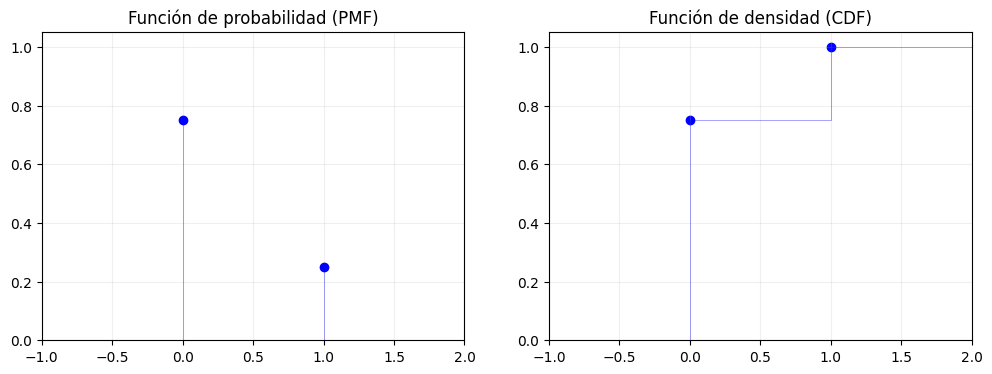

In [449]:
# plot de PMF y CDF
p = 0.25
x = [0,1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))

ax1.plot(0,bernoulli.pmf(p = p, k = x[0]), color = 'b', marker='o',  label=r'$k=0$')
ax1.vlines(0, 0, bernoulli.pmf(p=p, k = x[0]), colors='b', lw=0.5, alpha=0.5)

ax1.plot(1,bernoulli.pmf(p = p, k = x[1]), color = 'b', marker='o', label=r'$k=1$')
ax1.vlines(1, 0, bernoulli.pmf(p=p, k = x[1]), colors='b', lw=0.5, alpha=0.5)

ax1.grid(alpha = 0.2)
ax1.set_xlim([-1,2])
ax1.set_ylim([0,1.05])
ax1.set_title('Función de probabilidad (PMF)')

ax2.scatter(x,bernoulli.cdf(p = p, k = x), color = 'b', marker='o')

# Hay que modificar los arrays para plotear la función
x_step = [0] + x + [2]
y_step = [0] + list(bernoulli.cdf(p = p, k = x)) + [1]
ax2.step(x_step, y_step, where='post', color ='b', lw = 0.5, alpha = 0.5)

ax2.grid(alpha = 0.2)
ax2.set_xlim([-1,2])
ax2.set_title('Función de densidad (CDF)')
ax2.set_ylim([0,1.05])

plt.show()


# Binomial
Si se repite $n$ veces de forma independiente un experimento de Bernoulli de parámetro $p$, el espacio muestral $\Omega$ estará formado por cadenas de Es y Fs de longitud $n$.

$$X( \overbrace{EFFF...EEF}^n) = \text{número de éxitos en la cadena}$$


Su PDF será :
$$P_X(x) = P(X=x) = 
     \begin{cases}
       \binom{n}{x} \cdot p^x \cdot (1-p)^{n-x} &\quad\text{si } x = 0,1,...,n\\
       0 &\quad\text{en otro caso}\\
\end{cases}$$

Y su CDF:
La función de distribución no tiene fórmula cerrada, hay que acumular la función de probabilidad.

$$F_X(x) = P(X\leq x) = \sum^{x}_{i=0}P_X(i) =
     \begin{cases}
       0 &\quad\text{si }x \leq 0\\
       \sum^{k}_{i=0} \binom{n}{i} \cdot p^i \cdot (1-p)^{n-1}&\quad\text{si}
           \begin{cases}
           k \leq x < k+1 \\
           k=0,1,...,n\\
           \end{cases}\\
       1 &\quad\text{si }  \leq x\\
\end{cases}$$

Esperanza:
$$E(X) = \sum_{k=0}^{n}k \cdot \binom{n}{k} \cdot p^k \cdot q^{n-k} = n \cdot p $$
$$E(X^2) = \sum_{k=0}^{n}k^2 \cdot \binom{n}{k} \cdot p^k \cdot q^{n-k} = n \cdot p \cdot q-(n \cdot p)^2$$

Varianza:
$$Var(X) = E(X^2)-E(X)^2 = n \cdot p \cdot q$$

Recordatorio de que $\binom{n}{k} = \frac{n!}{k!(n-k)!}$

Las funciones de distribución de una binomial $B(n=1,p=0.3)$ y una Bernoulli $Be(p=0.3)$ coinciden.

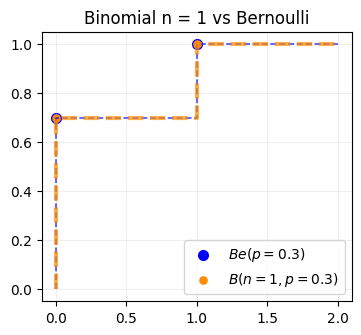

In [450]:
# se tiene que una bernoulli es una binomial con n = 1

x = [0,1]
p = 0.3
bercdf = bernoulli.cdf(p=p,k =  x)
bincdf = binom.cdf(p=p,k =  x, n= 1)

fig, ax = plt.subplots(1, 1, figsize = (4,3.5))

# bernoulli
plt.scatter(x, bercdf, color = 'b', linewidths = 2, label=r'$Be(p=0.3)$')
x_step = [0] + x + [2]
y_step = [0] + list(bercdf) + [1]
ax.step(x_step, y_step, where='post', ls = '--',color ='b', lw = 1.2, alpha = 0.7)

#binomial
plt.scatter(x, bincdf, linewidths = 0.2, color = 'darkorange', label=r'$B(n=1,p=0.3)$')
x_step = [0] + x + [2]
y_step = [0] + list(bincdf) + [1]
ax.step(x_step, y_step, where='post', ls = '--',color ='darkorange', lw = 3, alpha = 0.7)

ax.grid(alpha =0.2)
plt.legend()
plt.title('Binomial n = 1 vs Bernoulli')
plt.show()


### Cálculos en Python

In [290]:
from scipy.stats import binom

# Probabilidad del suceso
p = 0.25
n = 10

# valores estadísticos
mean, var, skew, kurt = binom.stats(n,p, moments = 'mvsk')

# también se pueden obtener así
#mean = binom.mean(n,p)
median = binom.mean(n,p)
#var = binom.var(n,p)
std = binom.std(n,p)


print("Media = ", mean)
print("Mediana = ", median)
print("Varianza = ", var)
print("Desviación típica = ", std)
print("Skewness = ", skew)
print("Kurtosis = ", kurt)

Media =  2.5
Mediana =  2.5
Varianza =  1.875
Desviación típica =  1.3693063937629153
Skewness =  0.3651483716701107
Kurtosis =  -0.06666666666666667


In [296]:
# Probabilidad de sacar 0 éxitos (F_X(0) = P(X =0))
binom.pmf(n=10,k=0,p=0.25)

0.056313514709472656

Evidentemente, la probabilidad de que la v.a. tome el valor 0 (osea, de sacar 0 éxitos, $P(X=0$), es la misma que la probabilidad de que la v.a. tome el valor 0 o inferior (es decir, de sacar 0 éxitos o menos, $P(X \leq 0)$. 
Por eso, la función de probabilidad y la de densidad dan lo mismo para $k=0$.

In [297]:
# Probabilidad de sacar 0 "o menos" éxitos (F_X(0) = P(X <=0))
binom.cdf(n=10,k=0,p=0.25)

0.056313514709472684

In [293]:
# Probabilidad de sacar 4 éxitos o menos(F_X(4) = P(X <=4))
binom.cdf(n=10,k=4,p=0.25)

0.9218730926513672

In [298]:
# Probabilidad de sacar 4 éxitos (F_X(4) = P(X =4))
binom.pmf(n=10,k=4,p=0.25)

0.14599800109863273

In [302]:
# generación de una muestra aleatoria simple (m.a.s.) simple random sampling
# de 100 valores con una población B(20,0.5)

# Este ejemplo correspondería a repetir 100 veces el experimento de lanzar una moneda 
#al aire 20 veces y contar el número de caras

binom.rvs(n = 20,p = 0.5, size=100, random_state=None)

array([ 9,  8, 11, 10, 10, 10, 12, 13,  9, 12, 16, 11, 10, 13,  5, 12, 12,
        7, 13,  9, 13,  9, 11, 12, 11, 13,  7,  8,  9, 12, 10, 11,  7,  8,
        9,  9,  6, 12, 11,  6, 13, 12,  5,  3, 11, 11, 11,  9, 11,  8, 14,
       10, 11, 10,  9, 11, 11,  9, 12, 11, 13, 10,  7,  8, 14,  9,  9, 11,
        8, 12,  9, 16,  6,  9, 12, 13,  8, 11, 10, 10, 13, 15,  5, 13, 10,
       12,  9, 12, 13,  8,  7, 11, 11,  9,  8, 12, 14,  8, 13,  9],
      dtype=int64)

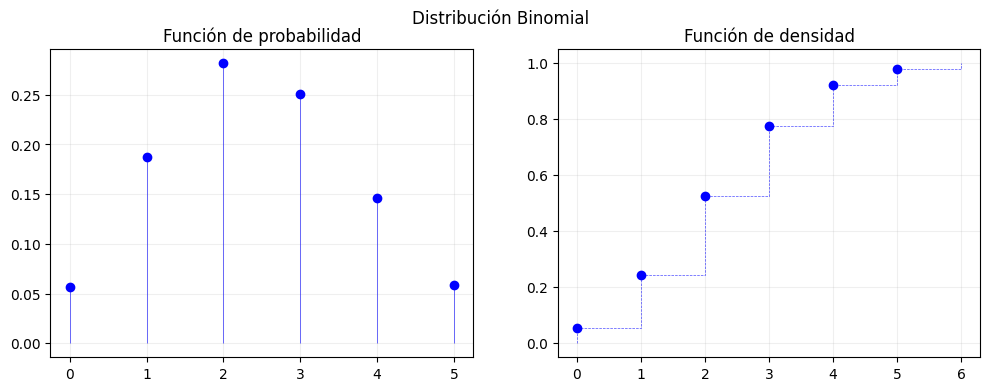

In [442]:
import numpy as np

n,p = 10, 0.25
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))

ax1.plot(x, binom.pmf(x,n,p), 'bo', label = 'binom pmf')
ax1.vlines(x, 0, binom.pmf(x,n,p), colors = 'b', lw = 0.5, alpha = 0.8)
ax1.set_title('Función de probabilidad')

ax2.plot(x, binom.cdf(x,n,p), 'bo', label = 'binom cdf')
x_step = [0] + list(x) + [6]
y_step = [0] + list(binom.cdf(x,n,p)) + [1]
ax2.step(x_step, y_step, where='post', ls = '--',color ='b', lw = 0.5, alpha = 0.7)
ax2.set_title('Función de densidad')

ax1.grid(alpha = 0.2)
ax2.grid(alpha = 0.2)
fig.suptitle('Distribución Binomial')
plt.show()

Ejemplo: Número de bolas rojas extraidas de una urna con reposición.

Tenemos una urna con 100 bolas de las cuales 40 son rojas y 60 blancas. extraemos al azara una bola, anotamos su color y la devolvemos a la urna.Supongamos que repetimos este proceso $n = 10$ veces.

Consideremos la v.a. $X = \text{número de bolas rojas extraídas (con reposición)}$ en $n=10$ repeticiones del mismo experimento de Bernoulli. Bajo estas condiciones tenemos una repetición de un proceso de Bernoulli con probabilidad de éxito de:
$$P(roja) = P(éxito) = 0.4$$

Asi que la v.a. sigue una ley Binomial $B(n=10,p=0.4)$

###### 1. Probabilidad de sacar exactamente 4 rojas
$$P_X(X=4) = \binom{10}{4} 0.4^4 (1-0.4)^{10-4}$$

In [399]:
# 1. Probabilidad de sacar exactamente 4 rojas
from math import comb

formula = comb(10,4) * 0.4**4 * (1-0.4)**(10-4)
pmf = binom.pmf(k = 4, n=10, p=0.4)

print(f'P(X=4) =\tcon formula: {formula:.5f} \tcon scipy {pmf:.5f}')

P(X=4) =	con formula: 0.25082 	con scipy 0.25082


###### 2. Probabilidad de sacar al menos 4 rojas
Al menos 4 rojas es $P(X \geq 4) = 1-P(X<4) = 1-P(X \leq 3)$

$$P(X \leq 3) = P(X=0)+P(X=1)+P(X=2)+P(X=3)$$ 

In [400]:
# 2. Probabilidad de sacar al menos 4 rojas
sumatorio = 0
for i in range(4):
    formula = comb(10,i) * 0.4**i * (1-0.4)**(10-i)
    sumatorio = sumatorio + formula

resultado = 1-sumatorio
cdf = 1-binom.cdf(k =3 , n=10, p=0.4)

print(f'P(X>=4) =\tcon formula: {resultado:.5f} \tcon scipy {cdf:.5f}')

P(X>=4) =	con formula: 0.61772 	con scipy 0.61772


###### 3. Probabilidad de sacar menos de 3 rojas

$$P(X<3) = P(X \leq 2) = P(X=0)+P(X=1)+P(X=2)$$

In [401]:
# 3. Probabilidad de sacar menos de 3 rojas
sumatorio = 0
for i in range(3):
    formula = comb(10,i) * 0.4**i * (1-0.4)**(10-i)
    sumatorio = sumatorio + formula

cdf = binom.cdf(k=2 , n=10, p=0.4)

print(f'P(X<3) =\tcon formula: {sumatorio:.5f} \tcon scipy {cdf:.5f}')

P(X<3) =	con formula: 0.16729 	con scipy 0.16729


###### 4. Valor esperado del número de bolas rojas
$$E(X) = \sum_{k=0}^{n}k \cdot \binom{n}{k} \cdot p^k \cdot q^{n-k} = n \cdot p $$


In [406]:
# 4. Valor esperado del número de bolas rojas
n = 10
p=0.4
E = n*p
Esci = binom(n,p).mean()
#Esci = binom.stats(n,p, moments = 'm')

print(f'P(X<3) =\tcon formula: {E:.3f} \tcon scipy {Esci:.3f}')

P(X<3) =	con formula: 4.000 	con scipy 4.000


###### 5. Desviación típica del número de bolas rojas

$$Var(X) = E(X^2)-E(X)^2 = n \cdot p \cdot q$$

In [407]:
# 5. Desviación típica del número de bolas rojas
var = n*p*(1-p)
std = np.sqrt(var)
std_sci = np.sqrt(binom(n,p).var())
#std_sci = binom.stats(n,p, moments = 'v')

print(f'E(X) =\tcon formula: {std:.3f} \tcon scipy {std_sci:.3f}')

E(X) =	con formula: 1.549 	con scipy 1.549


# Geométrica

Si repetimos un experimento Bernoulli de parámetro $p$, de forma independiente hasta obtener el primer éxito, la v.a. $X$ que cuenta el número de fracasos antes del primer éxito es una variable geométrica.

Por ejemplo, que hayamos tenido $x$ fracasos será una cadena de fracasos culminada con un éxito:
$$P( \overbrace{FFF...F}^xE) = P(F)^x \cdot P(E) = (1-p)^x \cdot p = q^x \cdot p$$

De una v.a. como esta diremos que sigue una distribución geométrica de parámetro $p$ y la denotaremos por $Ge(p)$.

Su dominio es $D_X = {0,1,2,...}$, podría ser hasta $\infty$, porque podría ser que *nunca* obtuviésemos un éxito y tendríamos que seguir intentandolo hasta que saliese un éxito.



Su PDF será :
$$P_X(x) = P(X=x) = 
     \begin{cases}
       (1-p)^x \cdot p^x \cdot (1-p)^{n-x} &\quad\text{si } x = 0,1,... \\
       0 &\quad\text{en otro caso}\\
\end{cases}$$


Ejemplo

Calculemos $P(x \leq 3)$.

Por la propiedad del suceso complementario, la probabilidad de que la v.a. sea igual o inferior a 3, es lo mismo que 1- la probabilidad de que la v.a. sea mayor a 3, que es lo mismo que 1- la probabilidad de que la v.a. sea 4 o mayor.

$$P(X \leq 3) = 1-P(X>3) = 1-P(X \geq 4)$$

Efectivamente, el evento de que $X > 3$ es que hemos fracasado más de 3 veces hasta conseguir el primer éxito; es decir, **hemos fracasado 4 o más veces**. Por tanto:

$${X>3} = {X \geq 4} = {FFFF}$$

Al ser sucesos independientes, tenemos que :
$$
 \begin{align}
 {X>3} = P({FFFF}) = P(F) \cdot P(F) \cdot P(F) \cdot P(F) \\
 (1-p) \cdot (1-p) \cdot (1-p) \cdot (1-p)  = (1-p)^{3+1} \\
 = (1-p)^4
\end{align}$$

Calculamos:
$$F_X(3) = P(X \leq 3) = 1-P(X>3) = 1-(1-p)^{3+1}$$

Generalizando para cualquier otro entero positivo $k = 0,1,2,...$ se obtiene se CDF:

$$F_X(x) = P(X\leq x)  =
     \begin{cases}
       0 &\quad\text{si }x < 0\\
       1-(1-p)^{k+1} &\quad\text{si}
           \begin{cases}
           k \leq x < k+1 \\
           \text{para }k=0,1,...\\
           \end{cases}\\
\end{cases}$$

Esperanza

$$E(X) = \sum^{+ \infty}_{x=0} x \cdot P_x(x) = \sum^{+ \infty}_{x=0} x \cdot (1-p)^x \cdot p =  p \cdot (1-p) \cdot \sum^{+ \infty}_{x=0}  \cdot (1-p)^{x-1}=  p \cdot (1-p) \cdot \frac{1}{(1-(1-p))^2} = p \cdot (1-p)  \frac{1}{p^2} = \frac{1-p}{p}$$


Varianza
no voy a hacer el desarrollo
$$Var(X) = E(X^2)-E(X)^2 =\frac{1-p}{p^2}$$

Su CDF será:
$$F_Y(y ) = P(X\leq x)  =
     \begin{cases}
       0 &\quad\text{si }x < 0\\
       1-(1-p)^{k+1} &\quad\text{si}
           \begin{cases}
           k \leq x < k+1 \\
           \text{para }k=0,1,...\\
           \end{cases}\\
\end{cases}$$

 En lugar de contar el número de fracasos, queremos contar el número de intentos, no es tán distinto, porque el número de intentos siempre es uno más que el número de fracasos, siempre se intenta 1 vez más.
 
 Si definimos $Y = \text{número de intentos para obtener el primer éxito}$, entonces, $Y = X+1$, donde $X \sim Ge(p)$. Es decir, hacemos una transformación lineal de la v.a. $X$.
    
Si el dominio de $X$ era $D_X = \{0,1,2,...\}$, entonces, el dominio de $Y$ será $D_Y = \{1,2,...\}$.

La media se incrementa en un intento debido al éxito:
$$E(X) = E(X+1) = E(X) +1 = \frac{1-p}{p}+1 = \frac{1}{p}$$

La varianza es la misma:
$$Var(Y) = Var(X+1) = Var(X) = \frac{1-p}{p^2}$$

## Propiedad de la falta de memoria

La propiedad de falta de memoria nos dice que por mucho que hayamos esperado o intentado $j$ veces en nuestro experimento, la probabilidad de tener que fallar todavía $k$ veces más es la misma que si solo lo intentáramos esas $k$ veces.

$$P(X>k+j|X \geq j) = P(X>k)$$

Es decir, que el número de veces que voy a fallar hasta el primer éxito, no está condicionado por las veces que llevamos probando. Osea que es la misma que si empezase de nuevo el experimento.

Ejemplo

Tenemos un llavero con 10 llaves, solo una de ellas abre la puerta. Cada vez que probamos una llave y falla olvidamos que llave hemos probado. ¿Cuál es la probabilidad de que si ya lo hemos intentado 5 veces necesitemos más de 4 intentos adicionales para abrir la puerta?

Tomando $k=4$, $j=5$ y aplicando la propiedad de falta de memoria:

$$P(X > 4+5 |X \leq 5) = P(X > 4)$$

Después de 5 fracasos *no estamos más cerca de abrir la puerta*. La propiedad de falta de memoria nos dice que **después de cada intento, es como si empezásemos de nuevo a abrir la puerta**. Tras 5 fracasos la probabilidad de que fallemos más de 4 veces más es la misma.

¿Cuál es número de fracasos esperado hasta abrir la puerta?
$$E(X) = \frac{1-p}{p}=\frac{1- \frac{1}{10}}{\frac{1}{10}} = \frac{\frac{9}{10}}{\frac{1}{10}}=9$$

La varianza es:

$$Var(X) = \frac{1-p}{p^2} = \frac{1- \frac{1}{10}}{(\frac{1}{10})^2}=\frac{\frac{9}{10}}{\frac{1}{100}}=90$$

## Ejemplo: el clásico de fútbol

Sea $X$ la v.a. que cuenta el número de veces consecutivas que en un partido de fútbol de la liga el Barça no al Madrid, sea en el Camp Nou o el Bernabeu.

Si quiero saber cuantos partidos consecutivos de *el clásico* tengo que ver hasta ver ganar al Barçs por primera vez. Queremos estimar cuanto nos va a costar ese capricho.

Tendré que comprar las entradas y pagar los viajes de Barcelona a Madrid.

En wikipedia están los datos históricos de *el clásico* hasta el 3 de marzo de 2019: se han jugado 178 clásicos en los que el Madrid ganó en 72 ocasiones, el Barça en 72 y empataron 34 veces.

Nos hacemos las siguientes preguntas:

1. Si solo tengo dinero para ir a ver 3 partidos, ¿cuál es la probabilidad de no ver ganar al Barça en al menos tres partidos consecutivos?
2. ¿Cuántos partidos se tienen que jugar de media para ver ganar al Barça por primera vez?

Con los datos anteriores, se puede estimas la probabilidad de que el Barça gane un clásico cualquiera:
$$P(Barça) = \frac{72}{178}=0.4045$$

Por tanto, podemos modelar la v.a. $X$, que cuenta el número de veces consecutivas que en un partido de fútbol de la liga el Barça no gana al Madrid, con una ley geométrica empezando en cero con probabilidad de éxito $p = P(Barça) =0.4045$

$$X \sim Ge(p=0.4045)$$

La probabilidad de **no ver ganar al barsa en al menos 3 partidos** es:
$$P(X \geq 3) = 1 - P(X \leq 2) = 1-(1-(1-\frac{72}{178})^{2+1})=0.211$$

Hay un 21.12% de probabilidades de no ver ganar al Barça en al menos 3 partidos antes de ver uno en el que sí gane. 

Para responder a la segunda pregunta:

$$E(X)=\frac{1-p}{p}=\frac{1-0.4045}{0.4045}=1.4722$$

$$Var(X)=\frac{1-p}{p^2}=\frac{1-0.4045}{0.4045^2}=3.6397$$

## Cálculos con python

La de python no es como la de R. La de R comienza en 0, la de Python comienza en 1. 

La función de probabilidad por defecto en python es `geom.pmf(x,p,loc=0)`. Esta es una geométrica que cuenta el número de intentos para obtener el primer éxito.

Si queremos la que cuenta el número de fracasos para obtener el primer éxito (la geométrica que empieza en 0), hay que usar `geom.pmf(x,p,loc=-1)`

Es decir, `geom.pmf(x,p,loc=-1)=geom.pmf(x-1,p,loc=0)`.

In [412]:
from scipy.stats import geom

# Probabilidad del suceso
p = 0.25

# valores estadísticos
mean, var, skew, kurt = geom.stats(p, moments = 'mvsk')

# también se pueden obtener así
#mean = geom.mean(p)
median = geom.mean(p)
#var = geom.var(p)
std = geom.std(p)


print("Media = ", mean)
print("Mediana = ", median)
print("Varianza = ", var)
print("Desviación típica = ", std)
print("Skewness = ", skew)
print("Kurtosis = ", kurt)

Media =  4.0
Mediana =  4.0
Varianza =  12.0
Desviación típica =  3.4641016151377544
Skewness =  2.0207259421636903
Kurtosis =  6.083333333333333


In [433]:
# Probabilidad de sacar 0 éxitos (F_X(0) = P(X =0)) de una Ge(p=0.25)
# que es lo mismo que P(X <=0)
geom.pmf(k = 1, p=0.25),geom.pmf(k = 0, p=0.25,loc=-1)

(0.25, 0.25)

$$P(X = 0) = (1-0.25)^0 \cdot 0.25^1 = 0.25$$
$$P(X \leq 0) = 1- (1-0.25)^{0+1}  = 1-0.75= 0.25$$

In [434]:
# Probabilidad de sacar 0 éxitos P(X <=4) de una Ge(p=0.25)
geom.cdf(k = 5, p=0.25),geom.cdf(k = 4, p=0.25, loc = -1)

(0.7626953125, 0.7626953125)

$$P(X \leq 4) = 1- (1-0.25)^{4+1}  = 1-0.75^5= 0.7626$$

In [436]:
# generación de una muestra aleatoria simple (m.a.s.) simple random sampling
# número de veces que fracasamos hasta el primer éxito. 
array = geom.rvs(p = 0.25, size=25,loc = -1, random_state=None)
print(array)
print(f"Es decir, la primera vez, fracasamos {array[0]} veces hasta el primer éxito, la segunda vez {array[1]} veces, la tercera vez {array[2]} veces...")

[ 1  5  1  0  1  1  3  2  1  2  0  4  7 16  0  3  5  1  2  1  5  1  0  3
  0]
Es decir, la primera vez, fracasamos 1 veces hasta el primer éxito, la segunda vez 5 veces, la tercera vez 1 veces...


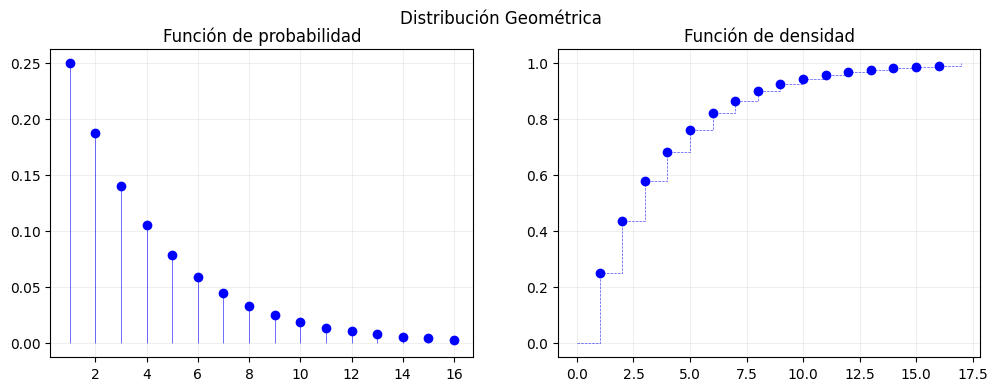

In [441]:
p = 0.25
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))

ax1.plot(x, geom.pmf(x,p), 'bo', label = 'binom pmf')
ax1.vlines(x, 0, geom.pmf(x,p), colors = 'b', lw = 0.5, alpha = 0.8)
ax1.set_title('Función de probabilidad')

ax2.plot(x, geom.cdf(x,p), 'bo', label = 'binom pmf')
x_step = [0] + list(x) + [17]
y_step = [0] + list(geom.cdf(x,p)) + [1]
ax2.step(x_step, y_step, where='post', ls = '--',color ='b', lw = 0.5, alpha = 0.7)
ax2.set_title('Función de densidad')

ax1.grid(alpha = 0.2)
ax2.grid(alpha = 0.2)
fig.suptitle('Distribución Geométrica')
plt.show()